In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
df[['Segmentation','Graduated']].value_counts()

Segmentation  Graduated
C             Yes          1607
D             No           1437
B             Yes          1332
A             Yes          1219
D             Yes           810
A             No            729
B             No            508
C             No            348
dtype: int64

In [ ]:
col=df.columns

In [ ]:
col

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df.shape

(8068, 11)

In [ ]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
!pip install ydata_profiling

In [32]:
from ydata_profiling import ProfileReport

In [33]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-34-96a0628eed42>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-34-96a0628eed42>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-34-96a0628eed42>:7: UserWarning: 

`distplot` is a deprecated function and will b

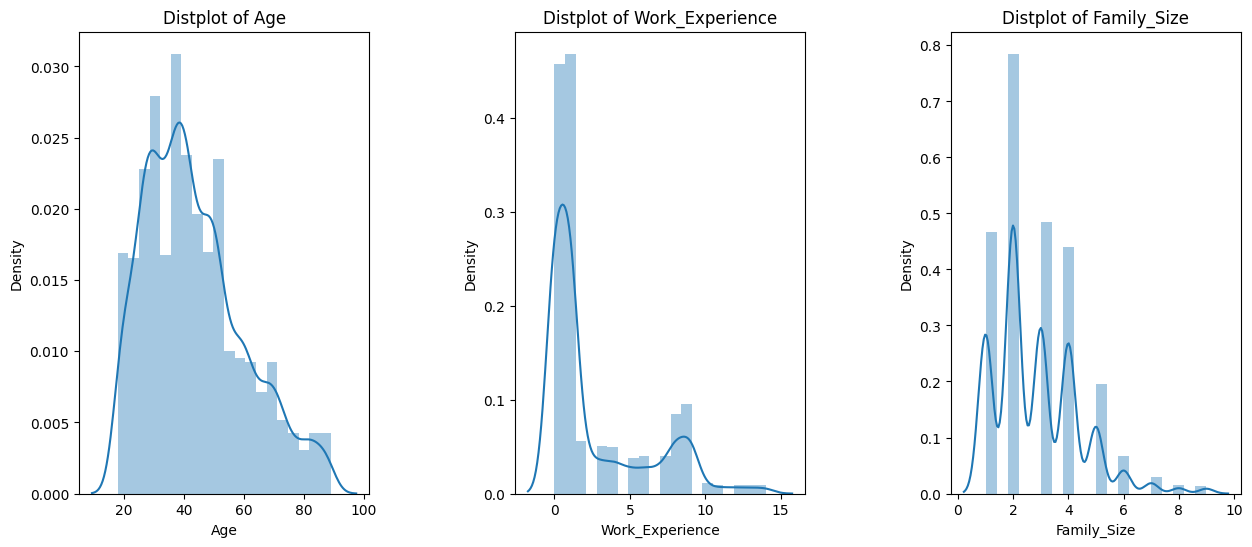

In [34]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Work_Experience' , 'Family_Size']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [37]:
df.groupby('Segmentation')[['Age','Work_Experience','Family_Size','Var_1']].agg('mean')

<ipython-input-37-dd836f740e38>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Segmentation')[['Age','Work_Experience','Family_Size','Var_1']].agg('mean')


,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.421411,2.888614,2.431931
B,48.113232,2.393766,2.682570
C,49.327907,2.224419,2.961628
D,32.956744,2.997154,3.241320


<ipython-input-38-69eb141168bc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')


<Axes: xlabel='Segmentation'>

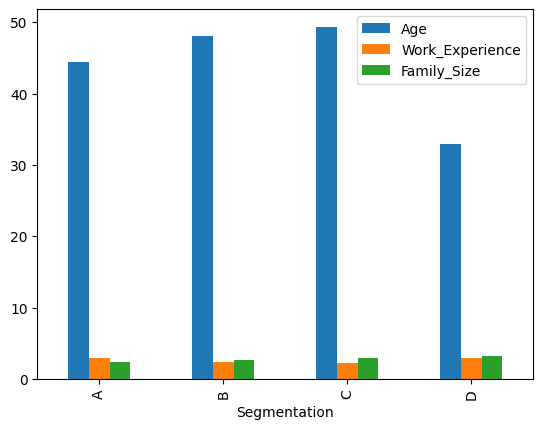

In [38]:
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')


In [39]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size','Var_1']].agg('mean')

<ipython-input-39-299bb2e4e274>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender')[['Age','Work_Experience','Family_Size','Var_1']].agg('mean')


,Age,Work_Experience,Family_Size
Gender,,,
Female,43.146252,2.826640,2.742972
Male,43.852869,2.468589,2.920859


<Axes: xlabel='Gender'>

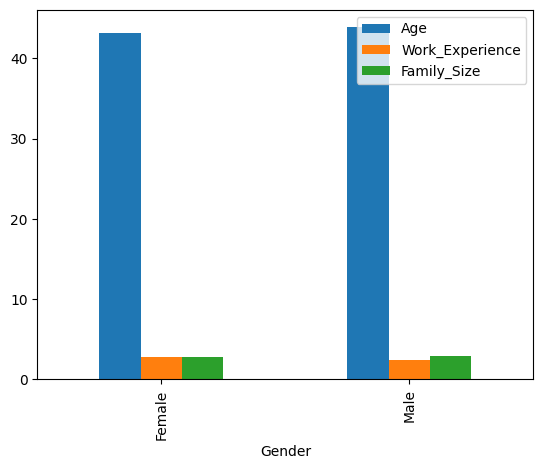

In [42]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'bar')

In [57]:
df.groupby(['Profession','Gender'])[['Gender']].count()


Gender
Profession    Gender        
Artist        Female    1055
              Male      1137
Doctor        Female     257
              Male       335
Engineer      Female     466
              Male       116
Entertainment Female     214
              Male       595
Executive     Female      22
              Male       483
Healthcare    Female     446
              Male       631
Homemaker     Female     144
              Male        31
Lawyer        Female     256
              Male       244
Marketing     Female     128
              Male       105

<Axes: ylabel='Profession,Gender'>

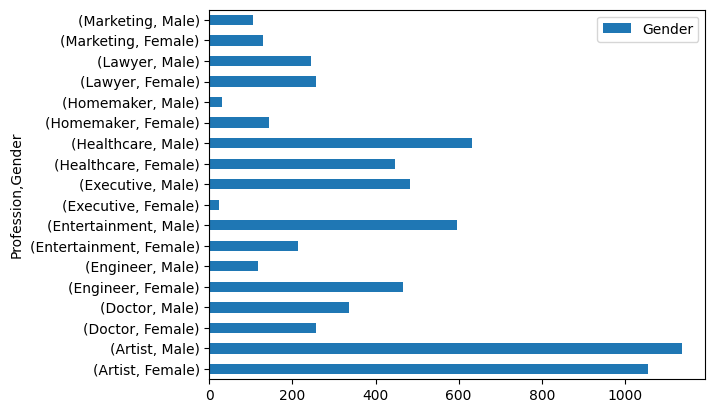

In [50]:
df.groupby(['Profession','Gender'])[['Gender']].count().plot(kind= 'barh')

In [48]:
                                                                                                        df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count()

Spending_Score
Gender Spending_Score                
Female Average                    692
       High                       393
       Low                       1903
Male   Average                    970
       High                       611
       Low                       2096

<Axes: ylabel='Gender,Spending_Score'>

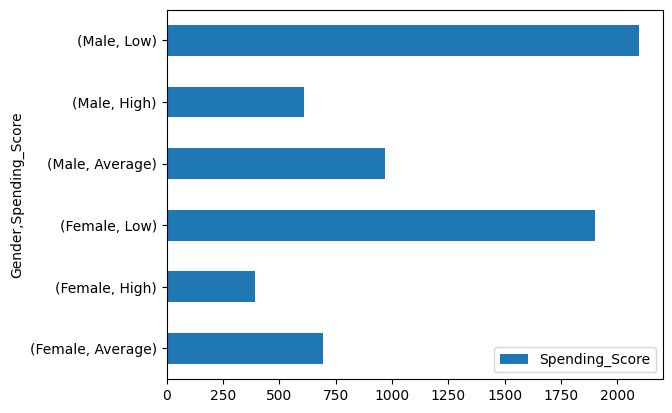

In [49]:
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count().plot(kind = 'barh')

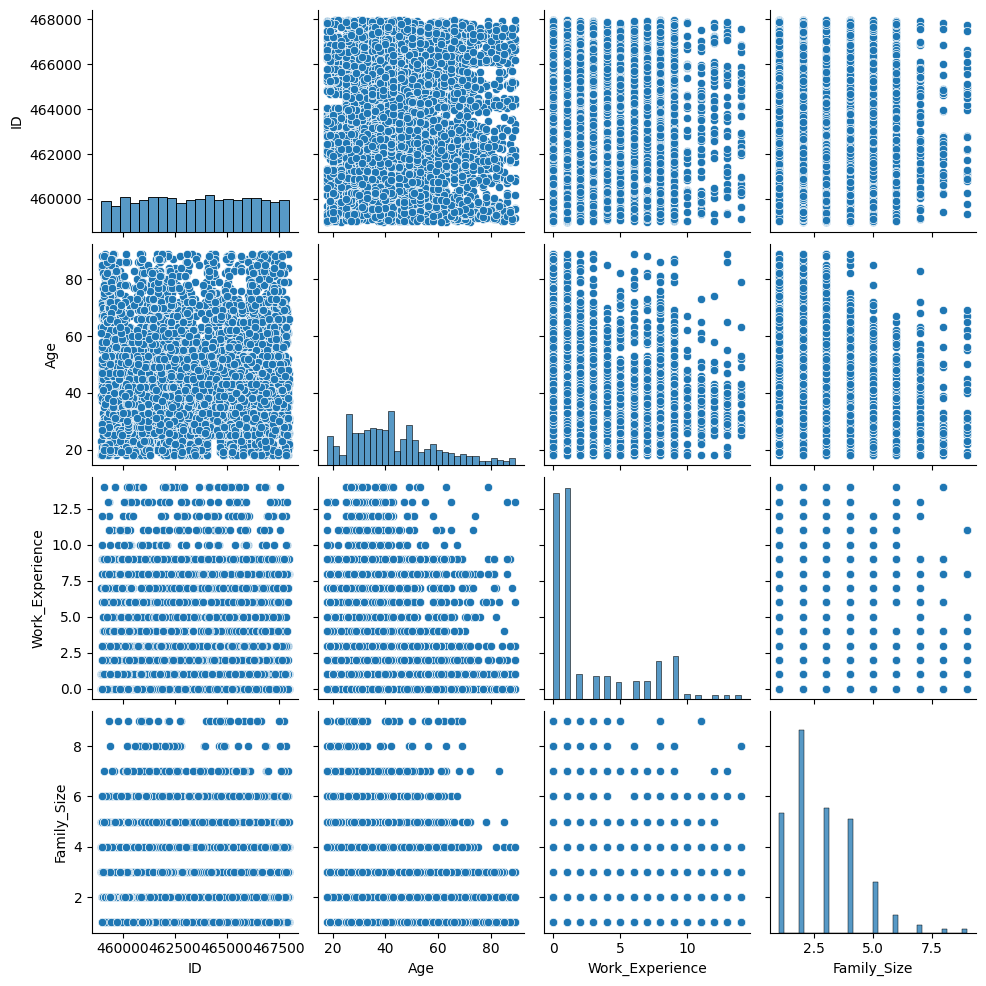

In [58]:
sns.pairplot(df)

<ipython-input-59-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

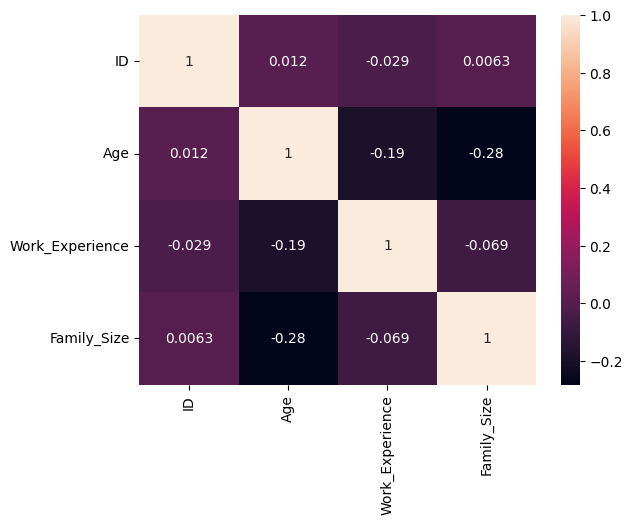

In [59]:
sns.heatmap(df.corr(),annot = True)

In [61]:
var = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(df,columns=var)
print(df_dummies.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])


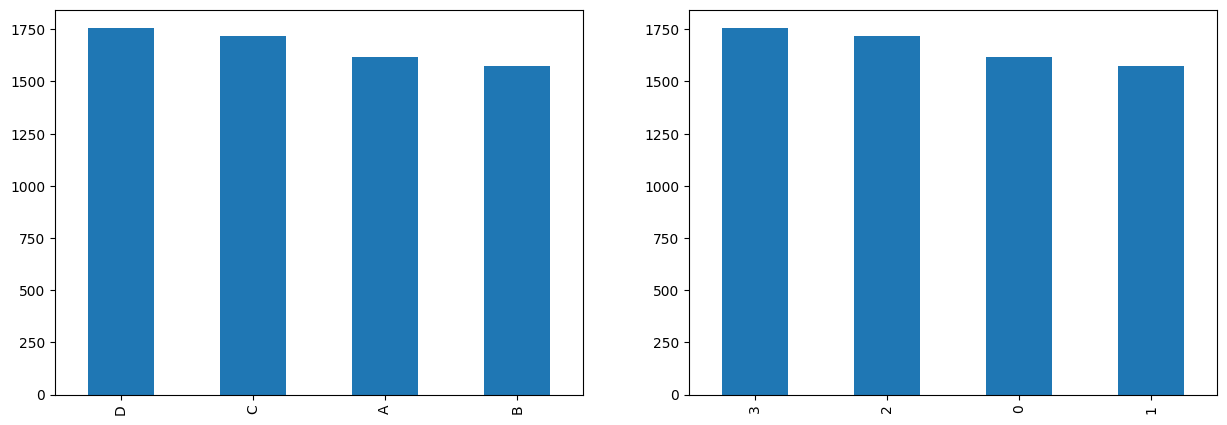

In [65]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df_dummies.drop(['Segmentation','ID'],axis = 1)
y = df_dummies['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [68]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

In [69]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
pred= dct.predict(X_test)

In [73]:
pred

[3 1 3 ... 1 2 0]


In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

score= accuracy_score(pred,y_test)
score

0.44561140285071266

In [75]:
# Rando, forest
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf =  RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
pred1=rf.predict(X_test)

In [80]:
pred1

array([3, 0, 3, ..., 2, 2, 2])

In [81]:
score= accuracy_score(pred1,y_test)
score

0.4816204051012753

In [82]:
# Using k means Clustering
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [97]:
X1 = df[['Age' , 'Family_Size']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


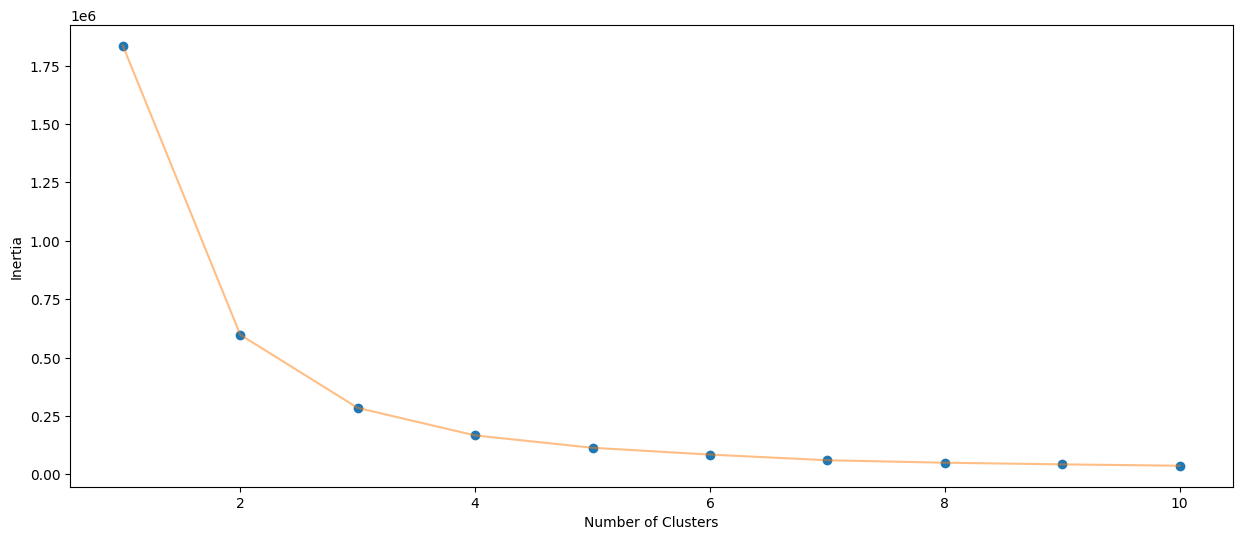

In [98]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [99]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

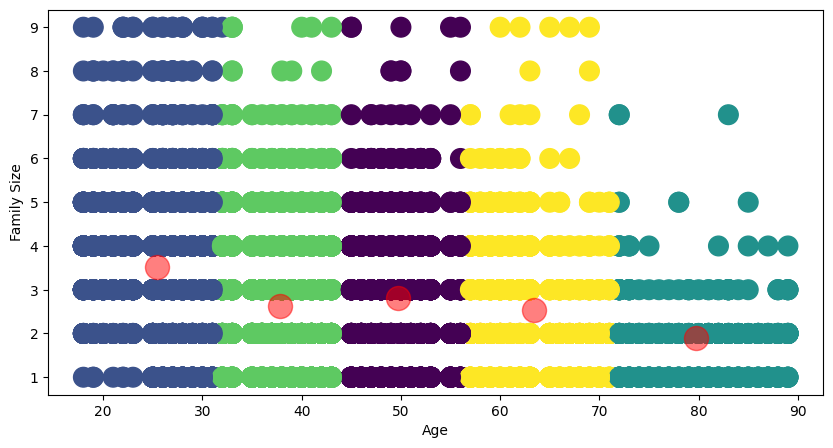

In [102]:
plt.figure(1 , figsize = (10 ,5 ) )


plt.scatter( x = 'Age' ,y = 'Family_Size' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Family Size') , plt.xlabel('Age')
plt.show()